# Exporting satellite images <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `DEA Sandbox` and `NCI` environments
* **Products used:** 
[ga_ls5t_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls5t_ard_3),
[ga_ls7e_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls7e_ard_3),
[ga_ls8c_ard_3](https://explorer.sandbox.dea.ga.gov.au/ga_ls8c_ard_3)


## Background



### Digital Earth Australia use case




## Description


***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages used for the analysis.

In [40]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(1, '../Supplementary_data/')
from notebookapp_imageexport import run_imageexport_app


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Analysis parameters

The following cell sets important required parameters for the analysis:

* `date`: The exact date used to extract imagery (e.g. `date='1988-01-01'`).
* `satellites`: The satellite data to be used to extract the image. 
Three options are currently supported:
 
|                    |                                                                                                                          | 
|--------------------|--------------------------------------------------------------------------------------------------------------------------|
| **Landsat**        | Data from the Landsat 5, 7 and 8 satellites                                                                              |
| **Sentinel-2**     | Data from the Sentinel-2A and 2B satellites                                                                              |
| **Sentinel-2 NRT** | Most recent 'near real time' data from Sentinel-2A and 2B. Use this to obtain imagery acquired in the past three months. |
    
* `style`: The style used to produce the image. 
Two options are currently supported:

|                    |                                                                                                                          | 
|--------------------|--------------------------------------------------------------------------------------------------------------------------|
| **True colour**    | Creates a true colour image using the red, green and blue satellite bands                                                |
| **False colour**   | Creates a false colour image using short-wave infrared, infrared and green satellite bands.                              |

* `resolution`: The spatial resolution to load data. 
The default is `resolution = (-30, 30)`, which will load data at 30 m pixel resolution. 
Increasing this (e.g. to `resolution = (-100, 100)`) can be useful for loading large spatial extents.

Optional parameters:

* `vmin, vmax`: The minimum and maximum surface reflectance values used to clip the resulting imagery to enhance contrast. 
* `percentile_stretch`: A tuple of two percentiles (i.e. between 0.00 and 1.00) that can be used to clip the imagery to optimise the brightness and contrast of the image. 
If this parameter is used, `vmin` and `vmax` will have no effect.
* `power`: Raises imagery by a power to reduce bright features and enhance dark features. 
This can add extra definition over areas with extremely bright features like snow, beaches or salt pans.


**If running the notebook for the first time**, keep the default settings below. This will demonstrate how the analysis works and provide meaningful results. 


In [47]:
# Required parameters
satellites = 'Landsat'
date = '2021-04-01'
style = 'True colour'
resolution = (-30, 30)

# Optional parameters
vmin, vmax = (0, 2000)
percentile_stretch = (1, 99)
power = 0.5

## Select location and export image
Run the following cell to start the analysis. 
This will plot an interactive map that is used to select the area to load satellite data for.

Select the `Draw a rectangle` or `Draw a polygon` tool on the left of the map, and draw a shape around the area you are interested in. 
When you are ready, press the green `done` button on the top right of the map. 
This will start loading the data, and then generate a filmstrips plot.

> Depending on the size of the area you select, this step can take **several minutes to complete**.
To keep load times reasonable, select an area **smaller than 30000 square kilometers** in size (this limit can be overuled by supplying the `size_limit` parameter in the `run_exportimage_app` function below).


Map(center=[-25.18, 134.18], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom…

/env/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38683 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:35397 Dashboard: /user/robbibt/proxy/38683/status,Cluster Workers: 1 Cores: 7 Memory: 63.57 GB


Loading imagery...

Finding datasets
    ga_ls5t_ard_3
    ga_ls7e_ard_3
    ga_ls8c_ard_3
Returning 1 time steps as a dask array

Exporting image to Landsat - 2021-03-31 - Canberra, Australian Capital Territory - True colour.png


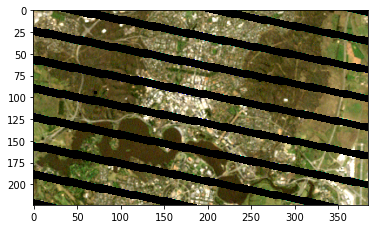

In [50]:
ds = run_imageexport_app(date, satellites, style, resolution, 
                         vmin, vmax, percentile_stretch, power)

## Downloading exported image
The high resolution image file generated above will be saved to the same location you are running this notebook from (e.g. typically `Real_world_examples`). 
In JupyterLab, use the file browser to locate the image file with a name in the following format: 

`Landsat - 2021-03-31 - Canberra, Australian Capital Territory - True colour.png`

If you are using the **DEA Sandbox**, you can download the image to your PC by right clicking on the image file and selecting `Download`.

## Next steps
When you are done, return to the [Analysis parameters](#Analysis-parameters) section, modify some values and rerun the analysis. 
For example, you could try:

* Modify `time_range` to look at a specific time period of interest (e.g. `time_range = ('1990-01-01', '2000-01-01')`.
* Setting a shorter `time_step` (e.g. `time_step = {'years': 2}`) for a more detailed look at how the landscape has changed over shorter time periods.
* Inspecting change along the coastline after controlling for tide using the `tide_range` parameter (e.g. `tide_range = (0.0, 0.3)` to look at the landscape during the lowest 30% of tides). 
For the best results, test this out in an area with high tides such as [Roebuck Bay in West Australia's Kimberley region](https://goo.gl/maps/ZkCcXUSbsVhRMsgM9).


***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** September 2021

**Compatible datacube version:** 

In [ ]:
import datacube
print(datacube.__version__)

## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)